In [5]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins=pd.read_csv('US-pumpkins.csv')


In [6]:
pumpkins.isnull()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,False,True,False,True,True,True,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
1,False,True,False,True,True,True,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
2,False,True,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
3,False,True,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
4,False,True,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,False,True,False,False,False,True,False,False,False,True,...,True,True,True,True,True,True,False,True,True,False
1753,False,True,False,False,False,True,False,False,False,True,...,True,True,True,True,True,True,False,True,True,False
1754,False,True,False,False,False,True,False,False,False,True,...,True,True,True,True,True,True,False,True,True,False
1755,False,True,False,False,False,True,False,False,False,True,...,True,True,True,True,True,True,False,True,True,False


In [7]:
print(pumpkins.head)

<bound method NDFrame.head of       City Name Type        Package      Variety Sub Variety  Grade     Date  \
0     BALTIMORE  NaN   24 inch bins          NaN         NaN    NaN  4/29/17   
1     BALTIMORE  NaN   24 inch bins          NaN         NaN    NaN   5/6/17   
2     BALTIMORE  NaN   24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3     BALTIMORE  NaN   24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4     BALTIMORE  NaN   24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   
...         ...  ...            ...          ...         ...    ...      ...   
1752  ST. LOUIS  NaN  22 lb cartons    MINIATURE   FLAT TYPE    NaN  9/30/16   
1753  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/26/16   
1754  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/27/16   
1755  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/28/16   
1756  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/29/16   

      Low

In [9]:
#FILTERING NEEDED COLUMNS
new_columns=['Package','Date','Low Price','High Price','Month']
pumpkins=pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
#creating new column for average price of low and high price for price prediction
price=(pumpkins['Low Price']+pumpkins['High Price'])/2
#FILTERING the month out of date for predicting price of pumpkins for a specific month of year
Month=pd.DatetimeIndex(pumpkins['Date']).month



In [11]:
#converting weight of pumpkin package to standard value for easy comparison
#and only for BUSSELS because bussels are standard package for sale
pumpkins=pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)


In [13]:
new_pumpkins = pd.DataFrame({'Month': Month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})


In [14]:
print(new_pumpkins.head())

   Month Package  Low Price  High Price  Price
0      4     NaN        NaN         NaN  275.0
1      5     NaN        NaN         NaN  275.0
2      9     NaN        NaN         NaN  160.0
3      9     NaN        NaN         NaN  160.0
4     11     NaN        NaN         NaN   95.0


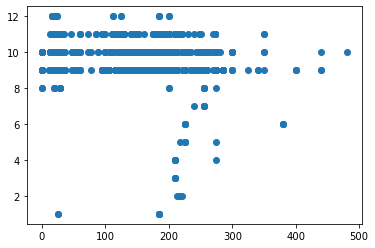

In [15]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()


<AxesSubplot:xlabel='Month'>

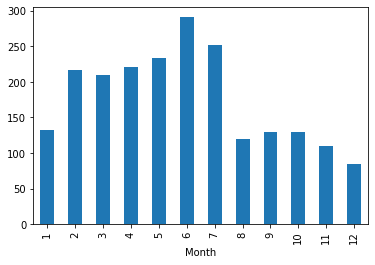

In [16]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind = 'bar')